# RMS Titanic Dataset Exploration

<img src='Titanic_Generated.JPG' width="700" height="500" style="display: block; margin: 0 auto;">

The Titanic dataset is a classic dataset often used in data science and machine learning to practice data analysis and modeling. This dataset contains information about the passengers and crew of the [RMS Titanic](https://www.encyclopedia-titanica.org/titanic/), including their survival status, demographic details, and ticket information.

***Key Variables***:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or died (0).
- Pclass: Passenger class (1st, 2nd, or 3rd).
- Name: Passenger name.
- Sex: Male or female.
- Age: Age in years.
- SibSp: Number of siblings or spouses aboard.
- Parch: Number of parents or children aboard.   
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).   

***Data Exploration and Preprocessing Goals***:

When working with the Titanic dataset, the primary goals for exploration and preprocessing are:

1. Understand the data: Gain insights into the distribution of variables, identify missing values, and explore potential relationships between variables.

2. Clean and prepare the data: Handle missing values, correct inconsistencies, and transform variables as needed for analysis.

3. Feature engineering: Create new features or transform existing ones to improve model performance.


***Common Exploration and Preprocessing Tasks***:

- Data cleaning:
    - Handle missing values (e.g., imputation, deletion).
    - Correct inconsistencies or errors in the data.
    - Convert data types to appropriate formats (e.g., categorical, numerical).

- Data exploration:
    - Analyze the distribution of variables (e.g., histograms, box plots).
    - Identify outliers or anomalies.
    - Explore relationships between variables (e.g., correlation, scatter plots).

- Feature engineering:
    - Create new features based on existing variables (e.g., extract titles from names).
    - Transform variables to improve model performance (e.g., normalization, standardization).


By effectively exploring and preprocessing the Titanic dataset, you can lay a strong foundation for further analysis and modeling tasks, such as predicting passenger survival or understanding the factors influencing survival.

### Setup

In [1]:
import os
#The os module provides functions for interacting with the operating system, 
#such as working with files, directories, and environment variables.

import sys
#The sys module provides access to system-specific parameters and functions. 
#It can be used to interact with the Python interpreter, get information about the current environment, 
#and manipulate the execution of your Python programs.

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#from IPython.display import clear_output
#Imports the clear_output function from the IPython.display module. 
#This function is specifically used in IPython environments (like Jupyter Notebooks) to clear the output of the current cell.

#from six.moves import urllib
#The from six.moves import urllib statement imports the urllib module from the six library.
#This is a common practice in Python code that aims to be compatible with both Python 2 and Python 3.

### Loading Dataset

The Dataset used in this notebook is from [kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

In [2]:
# Download dateset locally and import as pandas dataframe
titanic_dataset = pd.read_csv("Titanic-Dataset.csv")

titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Data Exploration

By using .info(), you can:

- Identify missing data: Check for columns with a large number of null values.
- Determine data types: Ensure that columns have the correct data types for your analysis.
- Assess data structure: Understand the overall structure of your DataFrame, including the number of rows and columns and their types.
- Optimize memory usage: Identify opportunities to reduce memory consumption by converting data types or dropping unnecessary columns.

In [3]:
# Check the data types and check for missing values
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Change data types as needed

titanic_dataset = titanic_dataset.astype({'Survived':'category', 'Pclass':'category', 'Sex':'category','Embarked':'category'})

In [5]:
# Check the data types and check for missing values
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


### Data Cleaning and Preprocessing

Data cleaning and preprocessing is a fundamental step that lays the foundation for successful machine learning projects. By carefully considering the specific needs of your data and your modeling goals, you can effectively clean, transform, and prepare your data for analysis.

This step is crucial for preparing data for analysis and modeling, and is crucial for:

- Improve data quality: Remove inconsistencies, errors, or missing values that might affect your model's performance.
- Create relevant features: Create new features that capture important information or relationships within your data.
- Prepare data for modeling: Ensure that your data is in a format that is compatible with your chosen machine learning algorithms.

#### Remove, Rename, and Create columns as needed

In [6]:
# Removing the columns that are not needed
titanic_dataset = titanic_dataset.drop(columns=['Name','PassengerId'])

In [7]:
# Rename columns to python standard lowercase

#.str.lower(): Applies the lower() method to each column name in the index, converting them to lowercase

titanic_dataset.columns = titanic_dataset.columns.str.lower()

titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Rename survived columns

titanic_dataset['survived'] = titanic_dataset['survived'].map({1:'yes', 0:'no'})

In [9]:
# create new column to identify passengers who were alone
titanic_dataset['alone'] = (titanic_dataset['sibsp'] + 
                            titanic_dataset['parch'] == 0).astype(str).replace('True', 'yes').replace('False', 'no')

titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,alone
0,no,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,yes,1,female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,yes,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes
3,yes,1,female,35.0,1,0,113803,53.1000,C123,S,no
4,no,3,male,35.0,0,0,373450,8.0500,NaN,S,yes


In [10]:
titanic_dataset['deck'] = titanic_dataset['cabin'].str[0]

titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,alone,deck
0,no,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,NaN
1,yes,1,female,38.0,1,0,PC 17599,71.2833,C85,C,no,C
2,yes,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,NaN
3,yes,1,female,35.0,1,0,113803,53.1000,C123,S,no,C
4,no,3,male,35.0,0,0,373450,8.0500,NaN,S,yes,NaN


In [11]:
unique_values = titanic_dataset['deck'].value_counts()
print(unique_values)

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [12]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,alone,deck
0,no,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,NaN
1,yes,1,female,38.0,1,0,PC 17599,71.2833,C85,C,no,C
2,yes,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,NaN
3,yes,1,female,35.0,1,0,113803,53.1000,C123,S,no,C
4,no,3,male,35.0,0,0,373450,8.0500,NaN,S,yes,NaN


### Data Visualization

#### Age Distribution

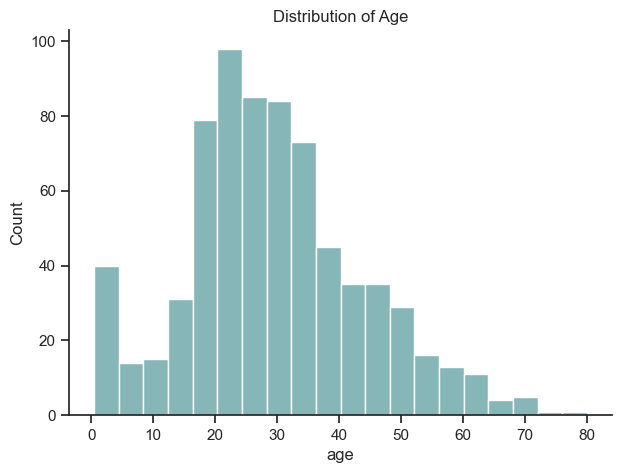

In [13]:
# Create a histogram
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

sns.histplot(
    data=titanic_dataset,
    x="age",
    color="cadetblue"
)

plt.title('Distribution of Age')

# Save the plot locally as an image file
plt.savefig('Distribution of Age.png')

#Display the generated plot
plt.show()

 - With the sns.histplot function,  one can effectively visualizes the distribution of ages within the Titanic dataset. The histogram will show the frequency of different age ranges within the data.

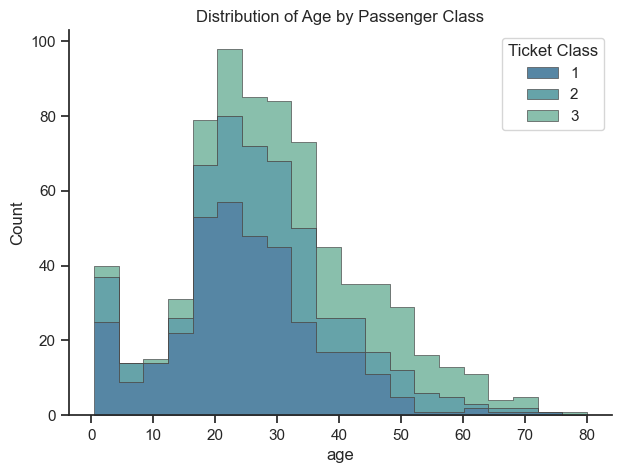

In [14]:
# Create a histogram
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

sns.histplot(
    titanic_dataset,
    x="age", hue="pclass",
    multiple="stack",
    palette="crest",
    edgecolor=".3",
    linewidth=.5,
    element="step"
)

# Add a title
plt.legend(title = "Ticket Class", labels=['1','2','3'])
plt.title('Distribution of Age by Passenger Class')

# Save the plot locally as an image file
plt.savefig('Distribution of Age by Passenger Class.png')

# Displays the generated plot
plt.show()

- The stacked histogram visualizes the distribution of ages within the Titanic dataset, categorized by passenger class (Pclass).
- Overall, this histogram effectively visualizes the relationship between "age" and "pclass" in the Titanic dataset, clearly indicating how the distribution of ages varies across passenger classes
- It is important to remember that by default, stacked histograms show the frequency or density of each category within each bin. This means that the height of each stack represents the number of data points that fall into that bin for a particular category. The total height of a bar in a stacked histogram represents the total frequency or density for that bin, regardless of category.
    * One can also explore Cumulative histograms, which show the cumulative sum of frequencies or densities across categories within each bin. This means that the height of each stack represents the total number of data points that fall into that bin and all previous bins for a particular category.

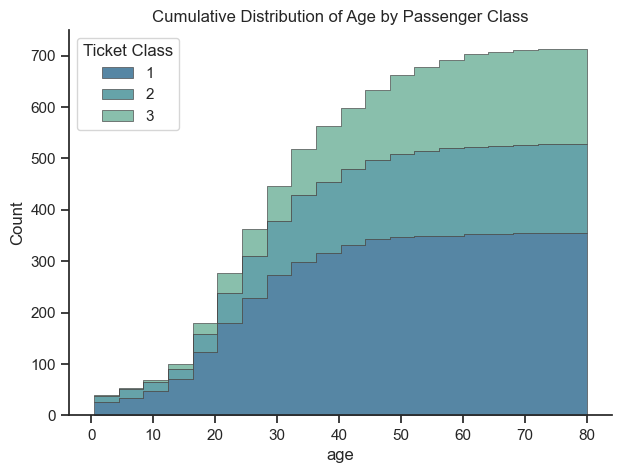

In [15]:
# Create a histogram
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

sns.histplot(
    titanic_dataset,
    x="age", hue="pclass",
    multiple="stack",
    palette="crest",
    edgecolor=".3",
    linewidth=.5,
    element="step",
    cumulative=True
)

# Add a title
plt.legend(title = "Ticket Class", labels=['1','2','3'])
plt.title('Cumulative Distribution of Age by Passenger Class')

# Save the plot locally as an image file
plt.savefig('Cumulative Distribution of Age by Passenger Class.png')

# Displays the generated plot
plt.show()

#### Gender Distribution

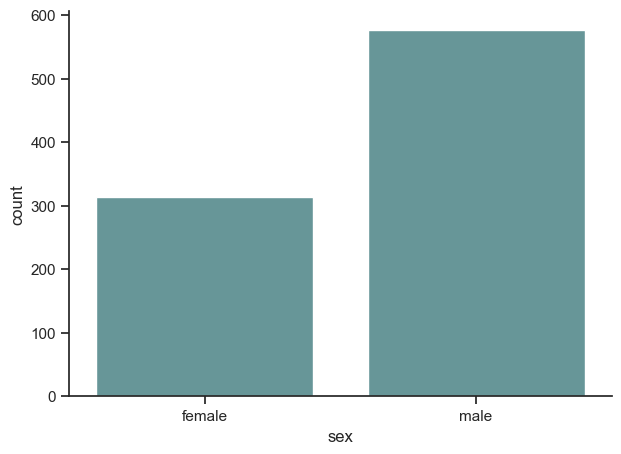

In [16]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)


sns.countplot(data=titanic_dataset, x='sex', color='cadetblue')

plt.show()

#### Visualizing the relationship between deck, fare, and gender

This code creates a nested barplot visualizing the relationship between "deck," "fare," and "sex" in the Titanic dataset. By removing NaN values from the "cabin" column, we ensure data consistency and avoid errors in the visualization.

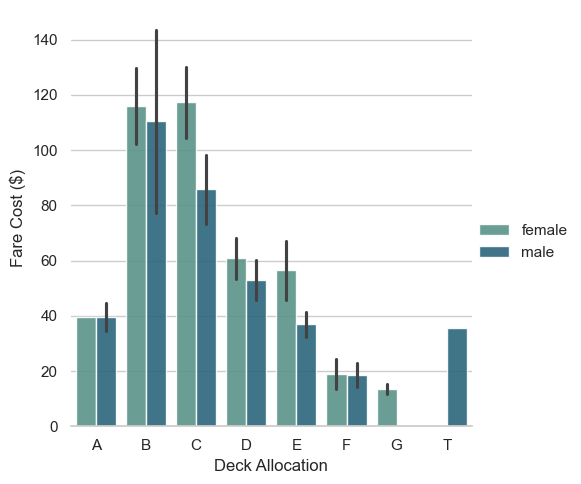

In [17]:
# Graph 1 # Utilizing the Seaborn library

# Remove all rows that have NaN values from the cabin column
graph1_df=titanic_dataset.dropna(subset=['cabin'])

# Sort the DataFrame by "deck" to ensure output graph is sorted by deck
graph1_df = graph1_df.sort_values('deck')

sns.set_theme(style="whitegrid")

# Draw a nested barplot by deck and sex
g = sns.catplot(
    data=graph1_df, kind="bar",
    x="deck", y="fare", hue="sex",
    errorbar="se", palette="crest", alpha=.9, height=5
)
g.despine(left=True)
g.set_axis_labels("Deck Allocation", "Fare Cost ($)")
g.legend.set_title("")

The resulting plot will display the average fare cost for each deck, separated by sex. The error bars indicate the variability in fare costs within each group. This visualization helps to identify potential differences in fare costs based on deck and gender.

#### Visualizing the relationship between Passenger class, fare and gender

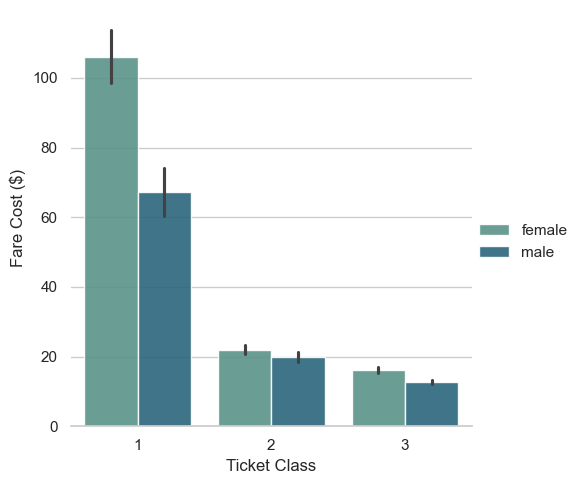

In [18]:
# Graph 1 # Utilizing the Seaborn library

# Remove all rows that have NaN values from the cabin column
graph1_df=titanic_dataset.dropna(subset=['pclass'])

# Sort the DataFrame by "deck" to ensure output graph is sorted by deck
graph1_df = graph1_df.sort_values('pclass')

sns.set_theme(style="whitegrid")

# Draw a nested barplot by deck and sex
g = sns.catplot(
    data=graph1_df, kind="bar",
    x="pclass", y="fare", hue="sex",
    errorbar="se", palette="crest", alpha=.9, height=5
)
g.despine(left=True)
g.set_axis_labels("Ticket Class", "Fare Cost ($)")
g.legend.set_title("")

#### Nested boxplot visualizing the relationship between age, and passenger

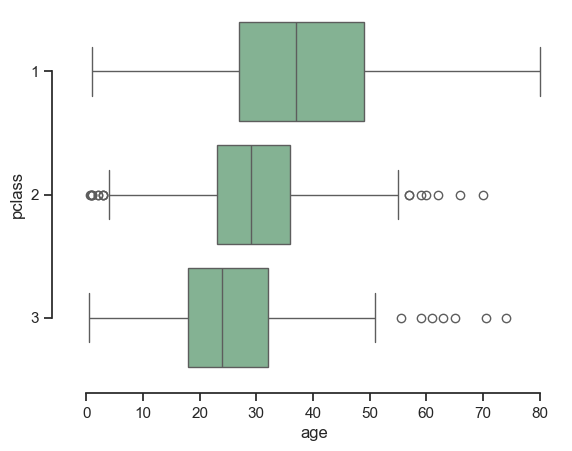

In [19]:
sns.set_theme(style="ticks", palette="crest")

# Draw a nested boxplot to show 
sns.boxplot(x="age", y='pclass', data=titanic_dataset)
sns.despine(offset=10, trim=True)

#### Visualizing the relationship between age, passenger class and those who survived

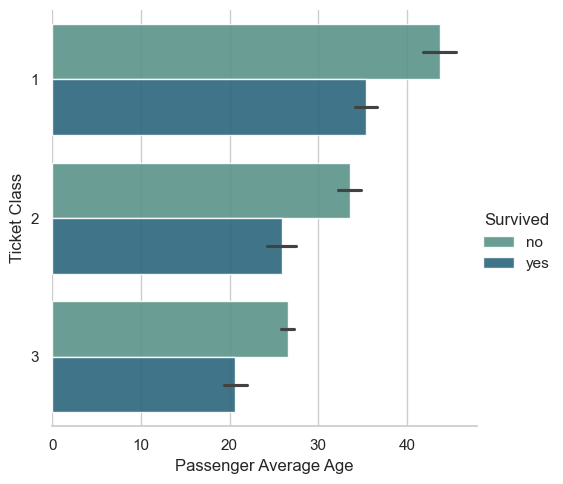

In [20]:
# Graph 1 # Utilizing the Seaborn library

# Remove all rows that have NaN values from the cabin column
graph1_df=titanic_dataset.dropna(subset=['pclass'])

# Sort the DataFrame by "deck" to ensure output graph is sorted by deck
graph1_df = graph1_df.sort_values('pclass')

sns.set_theme(style="whitegrid")

# Draw a nested barplot by deck and sex
g = sns.catplot(
    data=graph1_df, kind="bar",
    x="age", y="pclass", hue="survived",
    errorbar="se", palette="crest", alpha=.9, height=5
)
g.despine(left=True)
g.set_axis_labels("Passenger Average Age", "Ticket Class")
g.legend.set_title("Survived")

### Further Exploration

In [21]:
# Find the minimum and maximum values of the age column, ignoring nulls
# This is done in prepartion for creating the age groups 

titanic_dataset['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [22]:
# Creat a new column that shows which group the ages belong to
def age_group(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

titanic_dataset['age_group'] = titanic_dataset['age'].apply(age_group)
titanic_dataset

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,alone,deck,age_group
0,no,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,NaN,20 ~ 30
1,yes,1,female,38.0,1,0,PC 17599,71.2833,C85,C,no,C,30 ~ 40
2,yes,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,NaN,20 ~ 30
3,yes,1,female,35.0,1,0,113803,53.1000,C123,S,no,C,30 ~ 40
4,no,3,male,35.0,0,0,373450,8.0500,NaN,S,yes,NaN,30 ~ 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,2,male,27.0,0,0,211536,13.0000,NaN,S,yes,NaN,20 ~ 30
887,yes,1,female,19.0,0,0,112053,30.0000,B42,S,yes,B,10 ~ 20
888,no,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,no,NaN,None
889,yes,1,male,26.0,0,0,111369,30.0000,C148,C,yes,C,20 ~ 30


In [23]:
# Calculates the number of survivors and non-survivors within each age group
survivors = titanic_dataset[['age_group', 'survived']].groupby('age_group')['survived'].value_counts().unstack().fillna(0).sort_index()
survivors


survived,no,yes
age_group,,
0 ~ 10,24,38
10 ~ 20,61,41
20 ~ 30,143,77
30 ~ 40,94,73
40 ~ 50,55,34
50 ~ 60,28,20
60 ~ 70,13,6
70 ~ 80,6,0
80 ~ 90,0,1


In [24]:
# Calculate the survivial rate of each group
survivors['survival rate'] = (survivors['yes'] / (survivors['no'] + survivors['yes']) * 100).round(2)
survivors


survived,no,yes,survival rate
age_group,,,
0 ~ 10,24,38,61.29
10 ~ 20,61,41,40.20
20 ~ 30,143,77,35.00
30 ~ 40,94,73,43.71
40 ~ 50,55,34,38.20
50 ~ 60,28,20,41.67
60 ~ 70,13,6,31.58
70 ~ 80,6,0,0.00
80 ~ 90,0,1,100.00


#### Exploration: Did being alone increase chances of survival

<Axes: xlabel='age_group', ylabel='alone'>

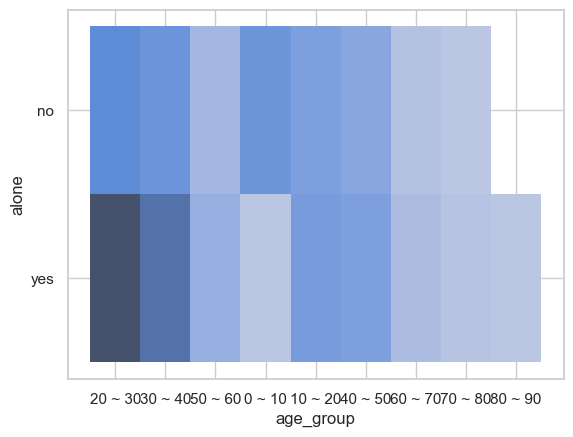

In [25]:
# Graph # Utilizing the Seaborn library

# Remove all rows that have NaN values from the cabin column
#graph1_df=titanic_dataset.dropna(subset=['cabin'])

# Sort the DataFrame by "deck" to ensure output graph is sorted by deck
#graph2_df = titanic_dataset.sort_values('age_group')

sns.set_theme(style="whitegrid")

# Draw a nested barplot by deck and sex
sns.histplot(titanic_dataset, x="age_group", y="alone")

#g.despine(left=True)
#g.set_axis_labels("Age Group", "Age")
#g.legend.set_title("")

#### Visualize the distribution of numerical data to identify any patterns or anomalies

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

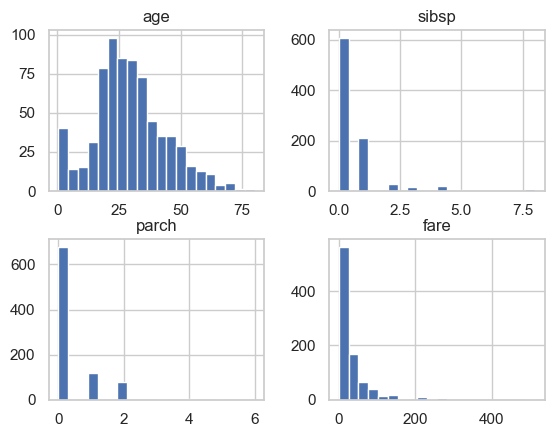

In [26]:
titanic_dataset.hist(bins=20)

- Generating histograms for each numerical column and adding the bins=20 argument specifying that 20 bins should be used for the histograms.

- This will create a series of histograms, one for each numerical column in the dataset, showing the distribution of values within each column. The x-axis of each histogram will represent the range of values in the column, and the y-axis will represent the frequency of values within each bin.